# 1 Import libraries

In [5]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3

from wordcloud import WordCloud


# Comments on the document

In [2]:
######## 
# This is Elisa's Code from 2023-06-02

# loaded dataset (subset of original dataset and pre-processed)
# df = pd.read_pickle("df_modeling.pkl")



#######################################################

# 2 MAJOR ANALYSIS CHAPTERS IN THIS NOTEBOOK

# Deletion of "mixed" class in texts
# we only have 2 classes to predict

################


# 1: Classification Models on Numeric Variables of Data
# for numeric analysis used dataset:
# create df_num


#### Models:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian
# Gradient Boosting
# XGBoost
# CatBoost

# KNN (needs standardisation --> scale dataset before fitting)
# SVM (needs standardisation --> scale dataset before fitting)
# Logistic Regression (needs standardisation --> scale dataset before fitting)


### Results
# LightGBM accuracy score : 1.0
# Naive Bayes Bernoulli accuracy score : 0.9910572966128521
# Naive Bayes Multinomial accuracy score : 0.5169357391579614
# Naive Bayes Complement accuracy score : 0.5169357391579614
# Naive Bayes Gaussian accuracy score : 0.5768439379550491
# GradientBoosting accuracy score : 1.0
# XGBoost accuracy score : 1.0
# CatBoost accuracy score : 1.0

# KNN accuracy score : 0.9992086103197214
# SVM accuracy score : 0.99113643558088
# Logistic Regression accuracy score : 1.0




################


# 2: Classification on Text Variables of our Data
# for text analysis:
# retrieve 2 columns title and content

# before fitting: vectorize with TF-IDF Vectorizer


#### Models:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian --> not working due to memory error
# Gradient Boosting
# XGBoost
# CatBoost --> error

# KNN --> takes 2 hours; only ran once, not again
# SVM --> takes 3,5 hours; only ran once, not again
# Logistic Regression


### Results
# LightGBM vect accuracy score : 0.8184552073440963
# Naive Bayes Bernoulli vect accuracy score : 0.710193099081988
# Naive Bayes Multinomial vect accuracy score : 0.7406616017727129
# Naive Bayes Complement vect accuracy score : 0.7610794555239
# GradientBoosting vect accuracy score : 0.5299145299145299
# XGBoost vect accuracy score : 0.7860873694207028

# Logistic Regression vect accuracy score : 0.8408515352959798



# LOADING PREPROCESSED DATASET df_modeling.okl

In [6]:
# retrieve dataset
df = pd.read_pickle("df_modeling.pkl")

In [7]:
df.head(5)

,id,source,title,content,url,published_utc,label,factuality,questionable-source,conspiracy-pseudoscience,...,Russia,USA,United Kingdom,Unknown,tokenized_content,tok_content_length,tokenized_title,tok_title_length,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,1.0,2.0,0.0,1.0,...,0,1,0,0,"[It, ’, s, been, noted, how, the, fanatical, n...",128,"[An, Unsettling, Realization, :, ‘, Mask, Zeal...",11,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,1.0,2.0,0.0,1.0,...,0,1,0,0,"[Episode, #, 416, of, SUNDAY, WIRE, SHOW, resu...",221,"[Episode, #, 416, –, ‘, Soldiers, of, Fortune,...",14,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,https://21stcenturywire.com/2022/07/15/ukc-new...,1657916785,1.0,2.0,0.0,1.0,...,0,1,0,0,"[Authoritarians, in, the, UK, government, are,...",251,"[UKC, News, :, UK, Thought, Police, ,, France,...",16,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",https://21stcenturywire.com/2022/05/22/twitter...,1653236268,1.0,2.0,0.0,1.0,...,0,1,0,0,"[After, the, 2020, election, ,, many, American...",630,"[Twitter, Audit, Finds, Half, of, President, B...",13,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,https://21stcenturywire.com/2022/03/11/ukc-new...,1647044296,1.0,2.0,0.0,1.0,...,0,1,0,0,"[The, high, stakes, game, surrounding, the, Uk...",167,"[UKC, News, :, The, Truth, About, US, Bio, Lab...",15,908,70


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   label                     85051 non-null  float64
 7   factuality                85051 non-null  float64
 8   questionable-source       85051 non-null  float64
 9   conspiracy-pseudoscience  85051 non-null  float64
 10  pro-science               85051 non-null  float64
 11  year                      85051 non-null  int64  
 12  month                     85051 non-null  int64  
 13  dayofyear                 85051 non-null  int64  
 14  dayof

In [9]:
# inspect labels
df["label"].value_counts()


0.0    36636
1.0    26542
2.0    21873
Name: label, dtype: int64

In [10]:
### DELETE 2 in labels (delete 21873 rows)
df = df[df["label"] != 2]


In [11]:
# inspect labels
df["label"].value_counts()

# 0.0    36636
# 1.0    26542

0.0    36636
1.0    26542
Name: label, dtype: int64

# CREATE NUMERIC DATASETS df_num

# x_train, x_test, y_train, y_test (lower case x and y)


In [12]:
df_num = df.select_dtypes(exclude=['object'])
print(df_num)


        published_utc  label  factuality  questionable-source  \
0          1650983484    1.0         2.0                  0.0   
1          1650823248    1.0         2.0                  0.0   
2          1657916785    1.0         2.0                  0.0   
3          1653236268    1.0         2.0                  0.0   
4          1647044296    1.0         2.0                  0.0   
...               ...    ...         ...                  ...   
106705     1665142200    1.0         1.0                  0.0   
106706     1660253100    1.0         1.0                  0.0   
106707     1655742000    1.0         1.0                  0.0   
106708     1642390200    1.0         1.0                  0.0   
106709     1664605800    1.0         1.0                  0.0   

        conspiracy-pseudoscience  pro-science  year  month  dayofyear  \
0                            1.0          0.0  2022      4        116   
1                            1.0          0.0  2022      4        114   


In [13]:
# STEP 1: DEFINE X and Y
x = df_num.drop(["label"], axis = 1)
y = df["label"]


In [14]:
x.head(3)

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,year,month,dayofyear,dayofthemonth,weekday,...,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown,tok_content_length,tok_title_length,nb_character_content,nb_character_title
0,1650983484,2.0,0.0,1.0,0.0,2022,4,116,26,1,...,0,0,0,1,0,0,128,11,720,61
1,1650823248,2.0,0.0,1.0,0.0,2022,4,114,24,6,...,0,0,0,1,0,0,221,14,1143,66
2,1657916785,2.0,0.0,1.0,0.0,2022,7,196,15,4,...,0,0,0,1,0,0,251,16,1340,82


In [15]:
x.dtypes

published_utc                 int64
factuality                  float64
questionable-source         float64
conspiracy-pseudoscience    float64
pro-science                 float64
year                          int64
month                         int64
dayofyear                     int64
dayofthemonth                 int64
weekday                       int64
weekend                       int32
word_count_content            int64
word_count_title              int64
Australia                     uint8
Bulgaria                      uint8
Canada                        uint8
Cyprus                        uint8
France                        uint8
Germany                       uint8
Ireland                       uint8
Israel                        uint8
Japan                         uint8
Kenya                         uint8
Macedonia                     uint8
Netherlands                   uint8
Qatar                         uint8
Russia                        uint8
USA                         

In [16]:
y.head(3)

0    1.0
1    1.0
2    1.0
Name: label, dtype: float64

In [17]:
# STEP 2: Split the dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)


# CREATE LightGBM MODEL

In [18]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [19]:
# Create a LightGBM dataset for training
LightGMB_train_data = lgb.Dataset(x_train, label=y_train)


In [20]:
# Set the hyperparameters for the LightGBM model
params_LightGBM = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [21]:
# Train the LightGBM model
clf_LightGBM = lgb.train(params_LightGBM, LightGMB_train_data, num_boost_round=100)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [22]:
# Make predictions on the test set
y_pred_LightGBM = clf_LightGBM.predict(x_test)
y_pred_LightGBM = [round(pred) for pred in y_pred_LightGBM]  # Convert probability to binary predictions


In [23]:
# get confusion matrix
pd.crosstab(y_test, y_pred_LightGBM, rownames=["real"], colnames=["predict"])

# works perfectly


predict,0,1
real,,
0.0,7293,0
1.0,0,5343


In [24]:
# Evaluate the model
accuracy_LightGBM = accuracy_score(y_test, y_pred_LightGBM)
print("Accuracy:", accuracy_LightGBM)

# 1.0


Accuracy: 1.0


In [25]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM classification report:\n", classification_report (y_test, y_pred_LightGBM))


LightGBM classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7293
         1.0       1.00      1.00      1.00      5343

    accuracy                           1.00     12636
   macro avg       1.00      1.00      1.00     12636
weighted avg       1.00      1.00      1.00     12636



In [26]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_LightGBM = confusion_matrix(y_test, y_pred_LightGBM)

print("Confusion Matrix:\n",  conf_matrix_LightGBM)


Confusion Matrix:
 [[7293    0]
 [   0 5343]]


# Create Naive Bayes Bernoulli Model

In [27]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern = BernoulliNB()


In [29]:
# Train the classifier
clf_Bern.fit(x_train, y_train)


BernoulliNB()

In [30]:
y_pred_Bern = clf_Bern.predict(x_test)


In [31]:
# Evaluate the model
accuracyNB_Bernoulli = accuracy_score(y_test, y_pred_Bern)
print("Accuracy:", accuracyNB_Bernoulli)

# 0.991


Accuracy: 0.9910572966128521


In [32]:
# get confusion matrix
pd.crosstab(y_test, y_pred_Bern, rownames=["real"], colnames=["predict"])

# looks ok

predict,0.0,1.0
real,,
0.0,7180,113
1.0,0,5343


In [33]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli classification report:\n", classification_report (y_test, y_pred_Bern))

# looks ok

Naive Bayes Bernoulli classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      7293
         1.0       0.98      1.00      0.99      5343

    accuracy                           0.99     12636
   macro avg       0.99      0.99      0.99     12636
weighted avg       0.99      0.99      0.99     12636



In [34]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_Bern = confusion_matrix(y_test, y_pred_Bern)

print("Confusion Matrix:\n",  conf_matrix_Bern)


Confusion Matrix:
 [[7180  113]
 [   0 5343]]


# Create Naive Bayes Multinomial

In [35]:
from sklearn.naive_bayes import MultinomialNB
clf_mult = MultinomialNB()


In [36]:
clf_mult.fit(x_train, y_train)


MultinomialNB()

In [37]:
# get accuracy
accuracyNB_Multinomial = clf_mult.score(x_test, y_test)
accuracyNB_Multinomial

# 0.516


0.5169357391579614

In [38]:
# get confusion matrix
y_pred_NB_Multinomial = clf_mult.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Multinomial, rownames=["real"], colnames=["predict"])

# worse than models before

predict,0.0,1.0
real,,
0.0,2925,4368
1.0,1736,3607


In [39]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial classification report:\n ", classification_report (y_test, y_pred_NB_Multinomial))


Naive Bayes Multinomial classification report:
                precision    recall  f1-score   support

         0.0       0.63      0.40      0.49      7293
         1.0       0.45      0.68      0.54      5343

    accuracy                           0.52     12636
   macro avg       0.54      0.54      0.52     12636
weighted avg       0.55      0.52      0.51     12636



In [40]:
# create confusion matrix
cf_matrix_Multinomial = confusion_matrix(y_test, y_pred_NB_Multinomial)
print(cf_matrix_Multinomial)


[[2925 4368]
 [1736 3607]]


# Create Naive Bayes Complement

In [41]:
from sklearn.naive_bayes import ComplementNB
clf_compl = ComplementNB()


In [42]:
clf_compl.fit(x_train, y_train)


ComplementNB()

In [43]:
# get accuracy
accuracyNB_Complement = clf_compl.score(x_test, y_test)
accuracyNB_Complement

# 0.5169


0.5169357391579614

In [44]:
# get confusion matrix
y_pred_NB_Complement = clf_compl.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Complement, rownames=["real"], colnames=["predict"])

# worse than model before

predict,0.0,1.0
real,,
0.0,2923,4370
1.0,1734,3609


In [45]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement classification report:\n ", classification_report (y_test, y_pred_NB_Complement))


Naive Bayes Complement classification report:
                precision    recall  f1-score   support

         0.0       0.63      0.40      0.49      7293
         1.0       0.45      0.68      0.54      5343

    accuracy                           0.52     12636
   macro avg       0.54      0.54      0.52     12636
weighted avg       0.55      0.52      0.51     12636



In [46]:
# create confusion matrix
cf_matrix_Complement = confusion_matrix(y_test, y_pred_NB_Complement)
print(cf_matrix_Complement)


[[2923 4370]
 [1734 3609]]


# Create Naive Bayes Gaussian


In [47]:
from sklearn.naive_bayes import GaussianNB
clf_gau = GaussianNB()


In [48]:
clf_gau.fit(x_train, y_train)


GaussianNB()

In [49]:
# get accuracy
accuracyNB_Gaussian = clf_gau.score(x_test, y_test)
accuracyNB_Gaussian

# 0.5768


0.5768439379550491

In [50]:
# get confusion matrix
y_pred_NB_Gaussian = clf_gau.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Gaussian, rownames=["real"], colnames=["predict"])


predict,0.0,1.0
real,,
0.0,7276,17
1.0,5330,13


In [51]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Gaussian classification report:\n ", classification_report (y_test, y_pred_NB_Gaussian))


Naive Bayes Gaussian classification report:
                precision    recall  f1-score   support

         0.0       0.58      1.00      0.73      7293
         1.0       0.43      0.00      0.00      5343

    accuracy                           0.58     12636
   macro avg       0.51      0.50      0.37     12636
weighted avg       0.52      0.58      0.42     12636



In [52]:
# create confusion matrix
cf_matrix_Gaussian = confusion_matrix(y_test, y_pred_NB_Gaussian)
print(cf_matrix_Gaussian)


[[7276   17]
 [5330   13]]


# CatBoost Model


In [53]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a CatBoost classifier object
catboost = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')


In [54]:
# Fit the model on the training data
catboost.fit(x_train, y_train)


0:	learn: 0.3501847	total: 282ms	remaining: 28s
1:	learn: 0.1777483	total: 339ms	remaining: 16.6s
2:	learn: 0.0897664	total: 359ms	remaining: 11.6s
3:	learn: 0.0474967	total: 373ms	remaining: 8.95s
4:	learn: 0.0260682	total: 387ms	remaining: 7.35s
5:	learn: 0.0148733	total: 400ms	remaining: 6.26s
6:	learn: 0.0092293	total: 413ms	remaining: 5.49s
7:	learn: 0.0060594	total: 428ms	remaining: 4.92s
8:	learn: 0.0041057	total: 443ms	remaining: 4.48s
9:	learn: 0.0028904	total: 457ms	remaining: 4.11s
10:	learn: 0.0020771	total: 472ms	remaining: 3.82s
11:	learn: 0.0015630	total: 485ms	remaining: 3.56s
12:	learn: 0.0011847	total: 505ms	remaining: 3.38s
13:	learn: 0.0009326	total: 518ms	remaining: 3.18s
14:	learn: 0.0007450	total: 533ms	remaining: 3.02s
15:	learn: 0.0006176	total: 546ms	remaining: 2.87s
16:	learn: 0.0005134	total: 563ms	remaining: 2.75s
17:	learn: 0.0004386	total: 576ms	remaining: 2.62s
18:	learn: 0.0003815	total: 593ms	remaining: 2.53s
19:	learn: 0.0003333	total: 632ms	remaining

In [55]:
# get accuracy
accuracy_CatBoost = catboost.score(x_test, y_test)
accuracy_CatBoost

# 1.0


1.0

In [56]:
# Make predictions on the test data
y_pred_catboost = catboost.predict(x_test)


In [57]:
pd.crosstab(y_test, y_pred_catboost, rownames=["real"], colnames=["predict"])

# perfect prediction

predict,0.0,1.0
real,,
0.0,7293,0
1.0,0,5343


In [58]:
# from sklearn.metrics import classification_report 

# get classification report
print("CatBoost classification report:\n ", classification_report (y_test, y_pred_catboost))


CatBoost classification report:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7293
         1.0       1.00      1.00      1.00      5343

    accuracy                           1.00     12636
   macro avg       1.00      1.00      1.00     12636
weighted avg       1.00      1.00      1.00     12636



# GradientBoostingClassifier


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier object
GradBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [60]:
# Fit the model on the training data
GradBoost.fit(x_train, y_train)

# takes 1 minute


GradientBoostingClassifier()

In [61]:
# Make predictions on the test data
y_pred_GradBoost = GradBoost.predict(x_test)


In [62]:
# Evaluate the model
accuracy_GradBoost = accuracy_score(y_test, y_pred_GradBoost)
accuracy_GradBoost

# 1.0


1.0

In [63]:
# Create crosstab
pd.crosstab(y_test, y_pred_GradBoost, rownames=["real"], colnames=["predict"])

# pperfect prediction


predict,0.0,1.0
real,,
0.0,7293,0
1.0,0,5343


In [64]:
from sklearn.metrics import classification_report 

# get classification report
print("GradientBoosting classification report:\n ", classification_report (y_test, y_pred_GradBoost))


GradientBoosting classification report:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7293
         1.0       1.00      1.00      1.00      5343

    accuracy                           1.00     12636
   macro avg       1.00      1.00      1.00     12636
weighted avg       1.00      1.00      1.00     12636



# XGBoost Model


In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a DMatrix for training and testing data
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)


In [66]:
# Set the hyperparameters for XGBoost
params_XGBoost = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [67]:
# Train the model
XGBoostmodel = xgb.train(params_XGBoost, dtrain, num_boost_round=100)


In [68]:
# Make predictions on the test data
y_pred_XGBoost = XGBoostmodel.predict(dtest)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_XGBoost]


In [69]:
# Evaluate the model
accuracy_XGBoost = accuracy_score(y_test, y_pred_binary)
accuracy_XGBoost

# 1.0

1.0

In [70]:
# Create crosstab
pd.crosstab(y_test, y_pred_XGBoost, rownames=["real"], colnames=["predict"])


predict,0.000048,0.000218,0.000221,0.000222,0.000224,0.000225,0.000226,0.000228,0.000228,0.000229,...,0.999887,0.999889,0.999891,0.999910,0.999911,0.999911,0.999912,0.999914,0.999916,0.999936
real,,,,,,,,,,,,,,,,,,,,,
0.0,6223,631,9,3,7,2,2,13,2,1,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,29,17,776,941,35,3,20,21,1048,1342


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("XGBoost classification report:\n ", classification_report (y_test, y_pred_XGBoost))

# not possible

# CREATE SCALED DATASET

In [42]:
# KNN needs standardisation
# SVM needs standardisation
# Logistic Regression need standardisation


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [72]:
cols = x_train.columns

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=cols)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=cols)


In [73]:
x_train_scaled

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,year,month,dayofyear,dayofthemonth,weekday,...,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown,tok_content_length,tok_title_length,nb_character_content,nb_character_title
0,0.055648,-1.873996,1.647713,-0.420498,-0.041525,0.0,0.147250,0.056877,-0.993261,0.132327,...,-0.007705,0.0,3.219140,-1.492122,-0.366361,-0.159962,-0.106798,0.314536,-0.130083,-0.183574
1,0.923308,-0.403772,-0.606902,2.378133,-0.041525,0.0,1.023465,0.927561,-1.107449,0.132327,...,-0.007705,0.0,-0.310642,-1.492122,-0.366361,-0.159962,-0.679320,-0.752081,-0.690434,-1.032936
2,0.699753,-1.138884,1.647713,-0.420498,-0.041525,0.0,0.731393,0.697930,-0.422322,-1.454527,...,-0.007705,0.0,-0.310642,-1.492122,2.729547,-0.159962,0.297414,0.741183,0.306285,1.217874
3,0.715443,0.331340,-0.606902,-0.420498,-0.041525,0.0,0.731393,0.717066,-0.193947,-0.396625,...,-0.007705,0.0,-0.310642,-1.492122,2.729547,-0.159962,0.746685,0.527860,0.710188,0.156171
4,1.559851,0.331340,-0.606902,-0.420498,-0.041525,0.0,1.607609,1.559047,-0.536510,1.719181,...,-0.007705,0.0,-0.310642,-1.492122,2.729547,-0.159962,-0.501732,0.527860,-0.509956,1.005534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50537,1.568332,-0.403772,-0.606902,-0.420498,-0.041525,0.0,1.607609,1.568615,-0.422322,-1.454527,...,-0.007705,0.0,-0.310642,-1.492122,2.729547,-0.159962,-0.089569,0.314536,-0.110399,0.708257
50538,-1.205523,-1.138884,1.647713,-0.420498,-0.041525,0.0,-1.313110,-1.206093,1.062119,0.661278,...,-0.007705,0.0,-0.310642,0.670186,-0.366361,-0.159962,0.765239,0.101213,0.646023,-0.098637
50539,1.642355,1.066452,-0.606902,-0.420498,-0.041525,0.0,1.607609,1.645158,0.491180,-0.925576,...,-0.007705,0.0,-0.310642,0.670186,-0.366361,-0.159962,-0.044509,-0.112111,-0.045724,-0.480850
50540,-1.097476,-1.138884,-0.606902,2.378133,-0.041525,0.0,-1.021038,-1.100846,-0.879073,-0.925576,...,-0.007705,0.0,-0.310642,-1.492122,-0.366361,6.251471,-0.770765,0.314536,-0.778372,0.410980


In [74]:
x_test_scaled

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,year,month,dayofyear,dayofthemonth,weekday,...,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown,tok_content_length,tok_title_length,nb_character_content,nb_character_title
0,0.824584,-1.873996,1.647713,-0.420498,-0.041525,0.0,0.731393,0.822314,1.062119,1.719181,...,-0.007705,0.0,3.219140,-1.492122,-0.366361,-0.159962,-0.059087,-0.965405,-0.064385,-0.778127
1,0.244762,-0.403772,1.647713,-0.420498,-0.041525,0.0,0.147250,0.248236,1.290495,-0.396625,...,-0.007705,0.0,-0.310642,0.670186,-0.366361,-0.159962,-0.259205,-0.112111,-0.315929,0.283576
2,-0.969602,1.066452,-0.606902,-0.420498,-0.041525,0.0,-1.021038,-0.966894,0.719556,-0.925576,...,-0.007705,0.0,-0.310642,0.670186,-0.366361,-0.159962,-0.484503,-1.178728,-0.471355,-1.245277
3,0.949024,0.331340,-0.606902,-0.420498,-0.041525,0.0,1.023465,0.946697,-0.879073,1.190230,...,-0.007705,0.0,-0.310642,0.670186,-0.366361,-0.159962,0.928249,-0.538758,1.054527,-0.990468
4,-0.385220,0.331340,-0.606902,-0.420498,-0.041525,0.0,-0.436894,-0.383249,0.719556,1.719181,...,-0.007705,0.0,-0.310642,-1.492122,2.729547,-0.159962,-0.063063,0.741183,-0.023228,0.623321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12631,0.392246,-0.403772,1.647713,-0.420498,-0.041525,0.0,0.439321,0.391756,-0.536510,0.132327,...,-0.007705,0.0,3.219140,-1.492122,-0.366361,-0.159962,-0.521611,0.741183,-0.507400,0.835661
12632,1.536614,1.066452,-0.606902,-0.420498,-0.041525,0.0,1.607609,1.539911,-0.764886,0.661278,...,-0.007705,0.0,-0.310642,0.670186,-0.366361,-0.159962,-0.533539,0.314536,-0.552136,0.156171
12633,-1.388615,-0.403772,-0.606902,-0.420498,-0.041525,0.0,-1.313110,-1.387885,-1.107449,1.719181,...,-0.007705,0.0,-0.310642,-1.492122,2.729547,-0.159962,-0.362577,0.741183,-0.347884,0.283576
12634,-1.230284,-1.873996,-0.606902,2.378133,-0.041525,0.0,-1.313110,-1.225229,0.833743,-0.396625,...,-0.007705,0.0,-0.310642,0.670186,-0.366361,-0.159962,0.111874,-0.325434,0.070590,-0.778127


# CREATE KNN ON SCALED DATA


In [75]:
# STEP 3: Instantiate the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)


In [76]:
# STEP 4: Fit the model

knn.fit(x_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [77]:
# STEP 5: Predict
y_pred_knn = knn.predict(x_test_scaled)


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 

pd.crosstab(y_test, y_pred_knn, rownames = ['Reality'], colnames = ['Prediction'])

### looks almost perfect

Prediction,0.0,1.0
Reality,,
0.0,7293,0
1.0,10,5333


In [79]:
# STEP 8: Evaluate model with score
# get accuracy
accuracy_knn = knn.score(x_test_scaled, y_test)
accuracy_knn

# 0.999


0.9992086103197214

In [80]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("KNN classification report:\n", classification_report (y_test, y_pred_knn))


KNN classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7293
         1.0       1.00      1.00      1.00      5343

    accuracy                           1.00     12636
   macro avg       1.00      1.00      1.00     12636
weighted avg       1.00      1.00      1.00     12636



In [81]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix:\n",  conf_matrix_knn)


Confusion Matrix:
 [[7293    0]
 [  10 5333]]


# CREATE SVM ON SCALED DATA


In [ ]:
# SVM - needs standardization


In [82]:
# Step 3: Instantiate model 
from sklearn import svm
clf_SVM = svm.SVC(gamma=0.01, kernel="poly")


In [83]:
# Step 4: Fit the model on the training dataset
clf_SVM.fit(x_train_scaled, y_train)

# takes 2 minutes

SVC(gamma=0.01, kernel='poly')

In [84]:
# get accuracy
accuracy_SVM = clf_SVM.score(x_test_scaled, y_test)
accuracy_SVM

# 0.99


0.99113643558088

In [85]:
# get confusion matrix
y_pred_SVM = clf_SVM.predict(x_test_scaled)
pd.crosstab(y_test, y_pred_SVM, rownames=["real"], colnames=["predict"])

# looks ok


predict,0.0,1.0
real,,
0.0,7293,0
1.0,112,5231


In [86]:
from sklearn.metrics import classification_report 

# get classification report
print("SVM classification report:\n ", classification_report (y_test, y_pred_SVM))


SVM classification report:
                precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      7293
         1.0       1.00      0.98      0.99      5343

    accuracy                           0.99     12636
   macro avg       0.99      0.99      0.99     12636
weighted avg       0.99      0.99      0.99     12636



In [87]:
# create confusion matrix
cf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print(cf_matrix_SVM)

# almost 100% accuracy for fake news!

[[7293    0]
 [ 112 5231]]


# CREATE LOGISTIC REGRESSION ON SCALED DATA

In [ ]:
# Logistic Regression - needs standardization


In [88]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg = LogisticRegression(C=1.0)


In [89]:
# Step 4: Fit the model on the training dataset
clf_LogReg.fit(x_train_scaled, y_train)


LogisticRegression()

In [90]:
# get accuracy
accuracy_logReg = clf_LogReg.score(x_test_scaled, y_test)
accuracy_logReg

# 1.0


1.0

In [91]:
# get confusion matrix
y_pred_LogReg = clf_LogReg.predict(x_test_scaled)
pd.crosstab(y_test, y_pred_LogReg, rownames=["real"], colnames=["predict"])

# 100% perfect prediction


predict,0.0,1.0
real,,
0.0,7293,0
1.0,0,5343


In [92]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression classification report:\n ", classification_report (y_test, y_pred_LogReg))


Logistic Regression classification report:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7293
         1.0       1.00      1.00      1.00      5343

    accuracy                           1.00     12636
   macro avg       1.00      1.00      1.00     12636
weighted avg       1.00      1.00      1.00     12636



In [93]:
# create confusion matrix
cf_matrix_LogReg = confusion_matrix(y_test, y_pred_LogReg)
print(cf_matrix_LogReg)

# 100% accuracy for fake news!


[[7293    0]
 [   0 5343]]


# COMPARE MODELS ON NUMERIC DATA ONLY


In [94]:
print("LightGBM accuracy score :", accuracy_LightGBM)
print("Naive Bayes Bernoulli accuracy score :", accuracyNB_Bernoulli)
print("Naive Bayes Multinomial accuracy score :", accuracyNB_Multinomial)
print("Naive Bayes Complement accuracy score :", accuracyNB_Complement)
print("Naive Bayes Gaussian accuracy score :", accuracyNB_Gaussian)
print("GradientBoosting accuracy score :", accuracy_GradBoost)
print("CatBoost accuracy score :", accuracy_CatBoost)
print("XGBoost accuracy score :", accuracy_XGBoost)
print("KNN accuracy score :", accuracy_knn)
print("SVM accuracy score :", accuracy_SVM)
print("Logistic Regression accuracy score :", accuracy_logReg)


LightGBM accuracy score : 1.0
Naive Bayes Bernoulli accuracy score : 0.9910572966128521
Naive Bayes Multinomial accuracy score : 0.5169357391579614
Naive Bayes Complement accuracy score : 0.5169357391579614
Naive Bayes Gaussian accuracy score : 0.5768439379550491
GradientBoosting accuracy score : 1.0
CatBoost accuracy score : 1.0
XGBoost accuracy score : 1.0
KNN accuracy score : 0.9992086103197214
SVM accuracy score : 0.99113643558088
Logistic Regression accuracy score : 1.0


In [95]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels={'LightGBM accuracy score':accuracy_LightGBM,'Naive Bayes Bernoulli':accuracyNB_Bernoulli,
        'Naive Bayes Multinomial':accuracyNB_Multinomial,'Naive Bayes Complement':accuracyNB_Complement,
        'Naive Bayes Gaussian':accuracyNB_Gaussian, 'GradientBoosting':accuracy_GradBoost,
        'CatBoost':accuracy_CatBoost, 'XGBoost':accuracy_XGBoost, 
        'KNN':accuracy_knn, 'SVM':accuracy_SVM, 'Logistic Regression':accuracy_logReg}


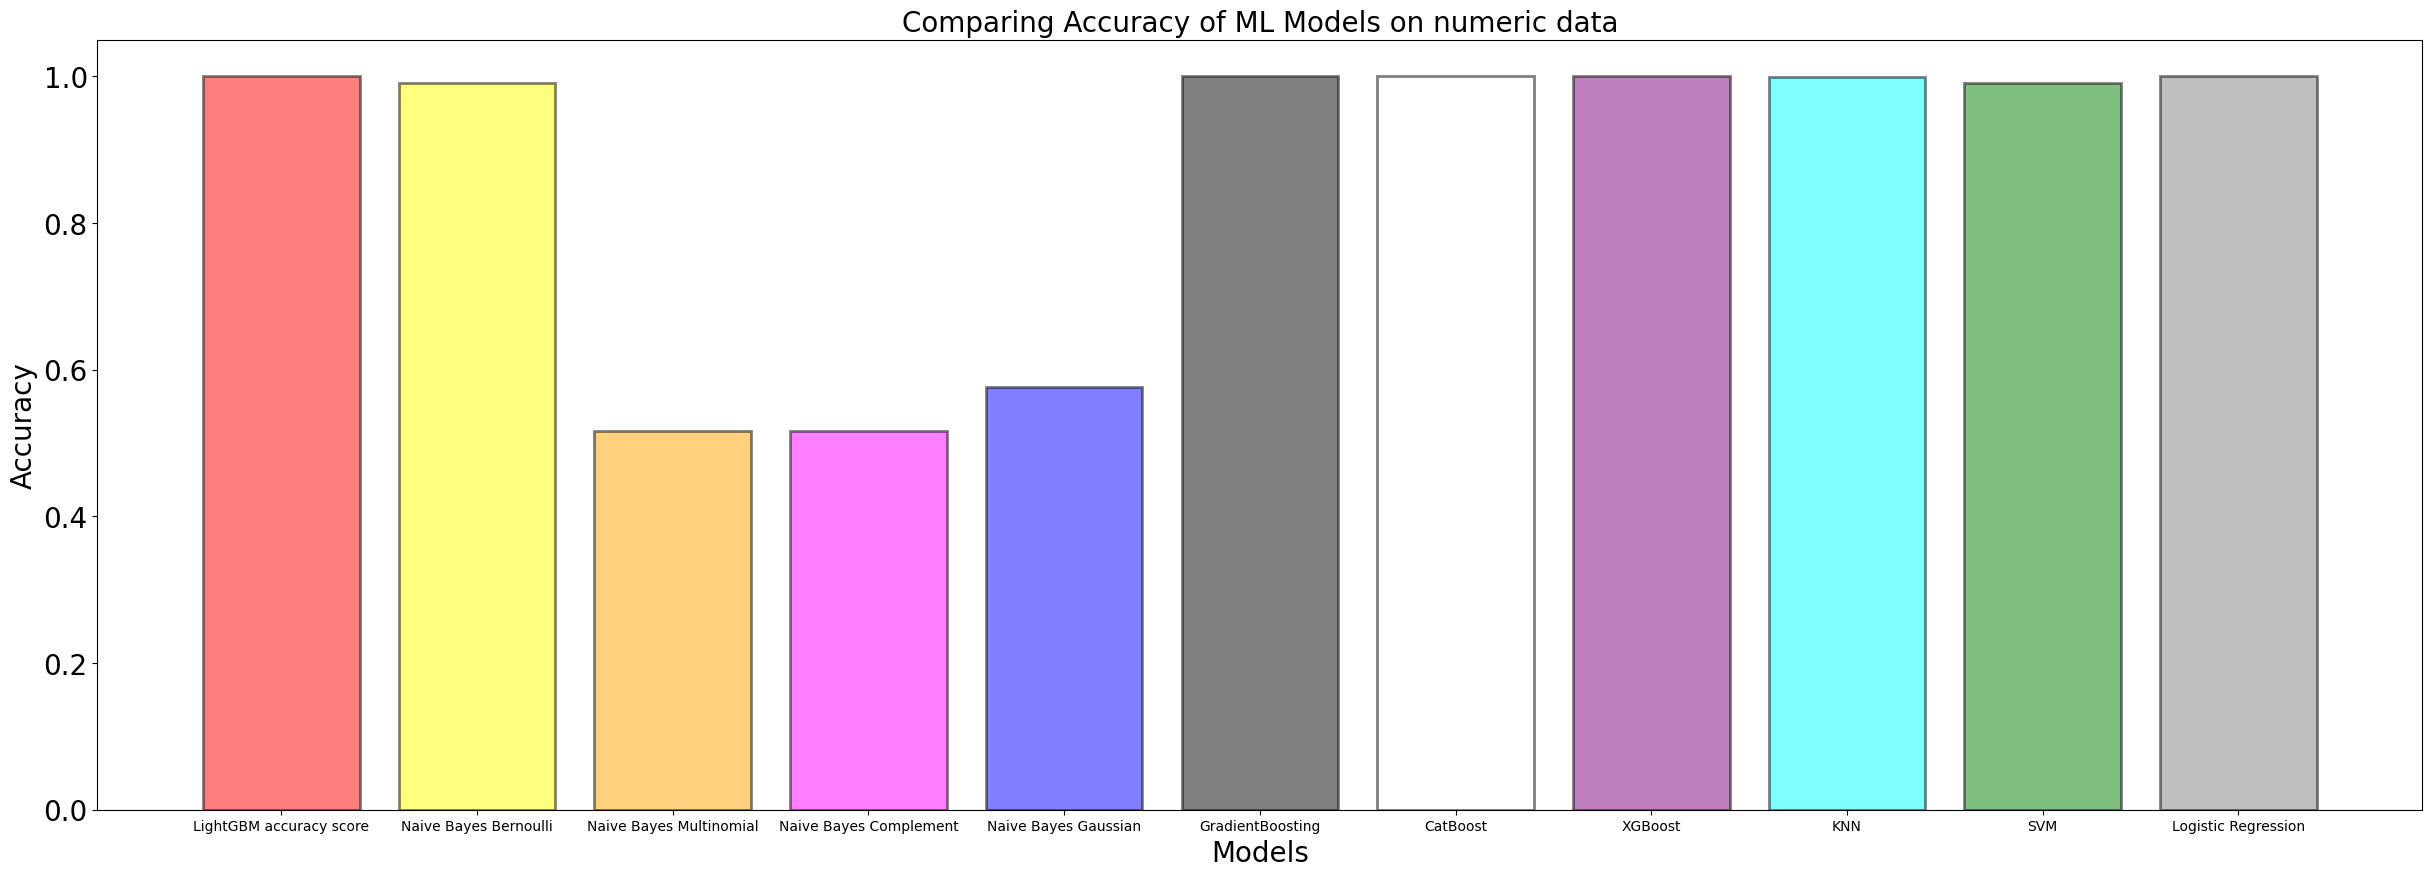

In [96]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(30,10))
plt.title('Comparing Accuracy of ML Models on numeric data',fontsize=20)
colors=['red','yellow','orange','magenta', 'blue', 'black', 'white', 'purple', 'cyan', 'green', 'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



# Create ML Models on text data (TF-IDF VECTORIZING)


In [ ]:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian

# KNN --> takes super long
# SVM --> takes super long
# Logistic Regression


# Create X and Y (only title and text)
# X_train_text, X_test_text, Y_train, Y_test (uppercase letters)


In [97]:
# STEP 1: DEFINE X and Y
X = df.drop("label", axis=1)
Y = df["label"]


In [98]:
X.columns = X.columns.astype(str)

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63178 entries, 0 to 106709
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        63178 non-null  object 
 1   source                    63178 non-null  object 
 2   title                     63178 non-null  object 
 3   content                   63178 non-null  object 
 4   url                       63178 non-null  object 
 5   published_utc             63178 non-null  int64  
 6   factuality                63178 non-null  float64
 7   questionable-source       63178 non-null  float64
 8   conspiracy-pseudoscience  63178 non-null  float64
 9   pro-science               63178 non-null  float64
 10  year                      63178 non-null  int64  
 11  month                     63178 non-null  int64  
 12  dayofyear                 63178 non-null  int64  
 13  dayofthemonth             63178 non-null  int64  
 14  weekd

## Create Train / Test Datasets

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# Vectorizing

### TFIDF Vectorizing
### USING CONTENT AND TITLE ONLY


In [101]:
# VECTORIZING
# TAKES 1 MINUTE

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()

vectorizer1.fit(X_train['content'])
vectorizer2.fit(X_train['title'])


TfidfVectorizer()

In [102]:
# TAKES 1 MINUTE

X_train_content = vectorizer1.transform(X_train['content'])
X_train_title = vectorizer2.transform(X_train['title'])
X_test_content = vectorizer1.transform(X_test['content'])
X_test_title = vectorizer2.transform(X_test['title'])


In [103]:
X_train_text = hstack([X_train_content, X_train_title])
X_test_text = hstack([X_test_content, X_test_title])


In [104]:
X_train_text

<50542x238650 sparse matrix of type '<class 'numpy.float64'>'
	with 12521947 stored elements in Compressed Sparse Row format>

In [105]:
X_train_text.shape

(50542, 238650)

In [106]:
X_test_text

<12636x238650 sparse matrix of type '<class 'numpy.float64'>'
	with 3079206 stored elements in Compressed Sparse Row format>

In [107]:
X_test_text.shape

(12636, 238650)

# LightGBM Model

In [108]:
# Create a LightGBM dataset for training
LightGMB_train_data_text = lgb.Dataset(X_train_text, label=Y_train)

# Set the hyperparameters for the LightGBM model
paramsLightGBM = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [109]:
# Train the LightGBM model
clf_LightGBM_vect = lgb.train(paramsLightGBM, LightGMB_train_data_text, num_boost_round=100)

# takes 3 minutes


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 8.670722 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [110]:
# Make predictions on the test set
y_pred_LightGBM_vect = clf_LightGBM_vect.predict(X_test_text)
y_pred_LightGBM_vect = [round(pred) for pred in y_pred_LightGBM_vect]  # Convert probability to binary predictions


In [111]:
# Evaluate the model
accuracy_LightGBM_vect = accuracy_score(Y_test, y_pred_LightGBM_vect)
print("Accuracy LightGBM vect:", accuracy_LightGBM_vect)

# 0.81


Accuracy LightGBM vect: 0.8184552073440963


In [112]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_LightGBM_vect = confusion_matrix(Y_test, y_pred_LightGBM_vect)

print("Confusion Matrix:\n",  conf_matrix_LightGBM_vect)


Confusion Matrix:
 [[6658  664]
 [1630 3684]]


In [113]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM vect classification report:\n", classification_report (Y_test, y_pred_LightGBM_vect))


LightGBM vect classification report:
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      7322
         1.0       0.85      0.69      0.76      5314

    accuracy                           0.82     12636
   macro avg       0.83      0.80      0.81     12636
weighted avg       0.82      0.82      0.81     12636



# Naive Bayes Bernoulli Model

In [114]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_vect = BernoulliNB()


In [115]:
# Train the classifier
clf_Bern_vect.fit(X_train_text, Y_train)


BernoulliNB()

In [116]:
# Make predictions on the test set
y_pred_Bern_vect = clf_Bern_vect.predict(X_test_text)


In [117]:
# Evaluate the model
accuracyNB_Bernoulli_vect = accuracy_score(Y_test, y_pred_Bern_vect)
print("Accuracy Naive Bayes Bernoulli:", accuracyNB_Bernoulli_vect)

# 0.70


Accuracy Naive Bayes Bernoulli: 0.710193099081988


In [118]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_Bern_vect = confusion_matrix(Y_test, y_pred_Bern_vect)

print("Confusion Matrix:\n",  conf_matrix_Bern_vect)


Confusion Matrix:
 [[4987 2335]
 [1327 3987]]


In [119]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli vect classification report:\n", classification_report (Y_test, y_pred_Bern_vect))


Naive Bayes Bernoulli vect classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.68      0.73      7322
         1.0       0.63      0.75      0.69      5314

    accuracy                           0.71     12636
   macro avg       0.71      0.72      0.71     12636
weighted avg       0.72      0.71      0.71     12636



# MULTINOMIAL NAIVE BAYES


In [120]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_vect = MultinomialNB()


In [121]:
# fit the model
clf_mult_vect.fit(X_train_text, Y_train)


MultinomialNB()

In [122]:
# get accuracy
accuracyNB_Multinomial_vect = clf_mult_vect.score(X_test_text, Y_test)
accuracyNB_Multinomial_vect

# 0.74


0.7406616017727129

In [123]:
# get confusion matrix
y_pred_NB_Multinomial_vect = clf_mult_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_NB_Multinomial_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0
real,,
0.0,7157,165
1.0,3112,2202


In [124]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial Vect classification report:\n ", classification_report (Y_test, y_pred_NB_Multinomial_vect))

Naive Bayes Multinomial Vect classification report:
                precision    recall  f1-score   support

         0.0       0.70      0.98      0.81      7322
         1.0       0.93      0.41      0.57      5314

    accuracy                           0.74     12636
   macro avg       0.81      0.70      0.69     12636
weighted avg       0.80      0.74      0.71     12636



In [125]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [126]:
# create confusion matrix
cf_matrix_Multinomial_vect = confusion_matrix(Y_test, y_pred_NB_Multinomial_vect)
print(cf_matrix_Multinomial_vect)


[[7157  165]
 [3112 2202]]


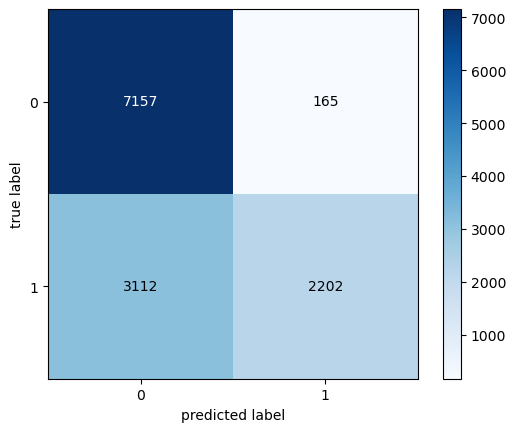

In [127]:
# absolute values
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Multinomial_vect,
                                colorbar=True)

plt.show()

<Axes: >

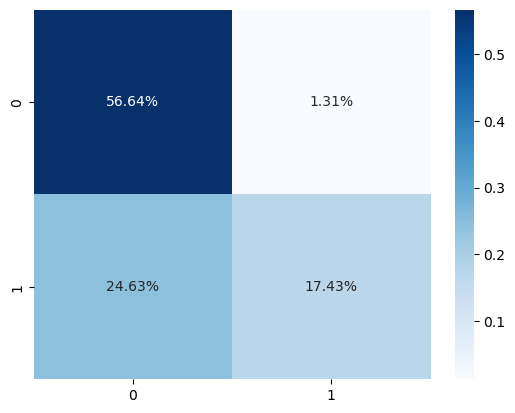

In [128]:
# percent
sns.heatmap(cf_matrix_Multinomial_vect/np.sum(cf_matrix_Multinomial_vect), annot=True, 
            fmt='.2%', cmap='Blues')

# COMPLEMENT NAIVE BAYES


In [146]:
from sklearn.naive_bayes import ComplementNB
clf_compl_vect = ComplementNB()


In [147]:
# fit model
clf_compl_vect.fit(X_train_text, Y_train)


ComplementNB()

In [148]:
# get accuracy
accuracyNB_Complement_vect = clf_compl_vect.score(X_test_text, Y_test)
accuracyNB_Complement_vect

# 0.76

0.7610794555239

In [149]:
# get confusion matrix
y_pred_NB_Complement_vect = clf_compl_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_NB_Complement_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0
real,,
0.0,7022,300
1.0,2719,2595


In [150]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement vect classification report:\n ", classification_report (Y_test, y_pred_NB_Complement_vect))


Naive Bayes Complement vect classification report:
                precision    recall  f1-score   support

         0.0       0.72      0.96      0.82      7322
         1.0       0.90      0.49      0.63      5314

    accuracy                           0.76     12636
   macro avg       0.81      0.72      0.73     12636
weighted avg       0.79      0.76      0.74     12636



In [151]:
# create confusion matrix
cf_matrix_Complement_vect = confusion_matrix(Y_test, y_pred_NB_Complement_vect)
print(cf_matrix_Complement_vect)


[[7022  300]
 [2719 2595]]


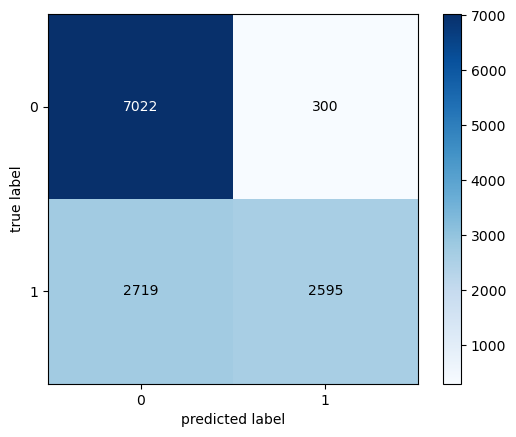

In [152]:
# absolute values
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Complement_vect,
                                colorbar=True)

plt.show();


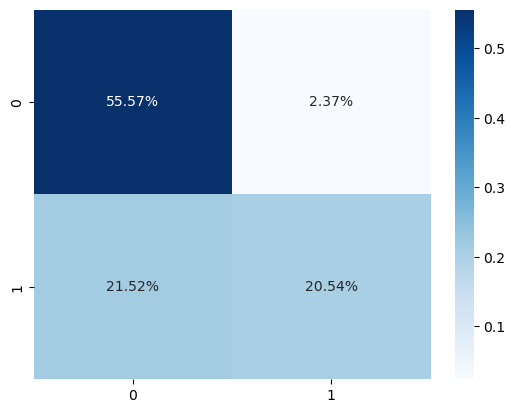

In [153]:
# percent
sns.heatmap(cf_matrix_Complement_vect/np.sum(cf_matrix_Complement_vect), annot=True, 
            fmt='.2%', cmap='Blues');


# Create NAIVE BAYES Gaussian
# not possible due to memory error


In [ ]:
# transform to avoid sparse matrix
# Convert sparse matrix to dense numpy array
# X_train_text_dense = X_train_text.toarray()


In [143]:
# from sklearn.naive_bayes import GaussianNB
# clf_gau_vect = GaussianNB()


In [ ]:
# clf_gau_vect.fit(X_train_text, Y_train)


In [ ]:
# get accuracy
# accuracyNB_Gaussian_vect = clf_gau_vect.score(X_test_text, y_test)
# accuracyNB_Gaussian_vect


In [ ]:
# get confusion matrix
# y_pred_NB_Gaussian_vect = clf_gau_vect.predict(X_test_text)
# pd.crosstab(y_test, y_pred_NB_Gaussian_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("Naive Bayes Gaussian vect classification report:\n ", classification_report (y_test, y_pred_NB_Gaussian_vect))

# really bad overall


In [ ]:
# create confusion matrix
# cf_matrix_Gaussian_vect = confusion_matrix(y_test, y_pred_NB_Gaussian_vect)
# print(cf_matrix_Gaussian_vect)


# GradientBoosting Model


In [167]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier object
GradBoost_vect = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


In [168]:
# Fit the model on the training data
GradBoost_vect.fit(X_train_text, Y_train)

# takes 15 minutes

GradientBoostingClassifier()

In [169]:
# Make predictions on the test data
y_pred_GradBoost_vect = GradBoost_vect.predict(X_test_text)


In [170]:
# Evaluate the model
accuracy_GradBoost_vect = accuracy_score(y_test, y_pred_GradBoost_vect)
accuracy_GradBoost_vect

# 0.5299

0.5299145299145299

In [171]:
pd.crosstab(Y_test, y_pred_GradBoost_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0
real,,
0.0,6756,566
1.0,2113,3201


In [172]:
from sklearn.metrics import classification_report 

# get classification report
print("GradientBoosting vect classification report:\n ", classification_report (Y_test, y_pred_GradBoost_vect))


GradientBoosting vect classification report:
                precision    recall  f1-score   support

         0.0       0.76      0.92      0.83      7322
         1.0       0.85      0.60      0.70      5314

    accuracy                           0.79     12636
   macro avg       0.81      0.76      0.77     12636
weighted avg       0.80      0.79      0.78     12636



In [173]:
# create confusion matrix
cf_matrix_GradBoost_vect = confusion_matrix(Y_test, y_pred_GradBoost_vect)
print(cf_matrix_GradBoost_vect)


[[6756  566]
 [2113 3201]]


# CatBoost Model
# error


In [187]:
# import catboost as cb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Create a CatBoost classifier object
# catboost_vect = cb.CatBoostClassifier(iterations=5, learning_rate=0.1, depth=6, loss_function='Logloss')


In [ ]:
# Fit the model on the training data
# catboost_vect.fit(X_train_text, Y_train)

# creates error :-(

In [ ]:
# get accuracy
# accuracy_CatBoost_vect = catboost_vect.score(X_test_text, Y_test)
# accuracy_CatBoost_vect


In [ ]:
# Make predictions on the test data
# y_pred_catboost_vect = catboost_vect.predict(X_test_text)


In [ ]:
# Get crosstab
# pd.crosstab(Y_test, y_pred_catboost_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("CatBoost vect classification report:\n ", classification_report (Y_test, y_pred_catboost_vect))


# XGBoost

In [174]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a DMatrix for training and testing data
dtrain_vect = xgb.DMatrix(X_train_text, label=Y_train)
dtest_vect = xgb.DMatrix(X_test_text, label=Y_test)


In [175]:
# Set the hyperparameters for XGBoost
params_XGBoost = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [176]:
# Train the model
XGBoostmodel_vect = xgb.train(params_XGBoost, dtrain_vect, num_boost_round=100)

# takes 3 minutes


In [177]:
# Make predictions on the test data
y_pred_XGBoost_vect = XGBoostmodel_vect.predict(dtest_vect)
y_pred_binary_vect = [1 if pred >= 0.5 else 0 for pred in y_pred_XGBoost_vect]


In [178]:
# Evaluate the model
accuracy_XGBoost_vect = accuracy_score(Y_test, y_pred_binary_vect)
accuracy_XGBoost_vect

# 0.786

0.7860873694207028

In [179]:
# Create crosstab
pd.crosstab(Y_test, y_pred_XGBoost_vect, rownames=["real"], colnames=["predict"])


predict,0.043790,0.048898,0.049976,0.050148,0.051230,0.052027,0.052880,0.052905,0.055705,0.055873,...,0.978782,0.980353,0.981326,0.983063,0.985419,0.985583,0.985796,0.986320,0.988030,0.988601
real,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("XGBoost vect classification report:\n ", classification_report (y_test, y_pred_XGBoost))

# not possible

# CREATE KNN ON TEXT DATA
# TAKES LONG!


In [170]:
# STEP 3: Instantiate the model
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = 6)


In [171]:
# STEP 4: Fit the model
# knn.fit(X_train_text, Y_train)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
# STEP 5: Predict
# y_pred_knn_vect = knn.predict(X_test_text)
# y_pred_knn_vect

# takes XXX minutes


In [ ]:
# Evaluate
# from sklearn.metrics import accuracy_score, precision_score, recall_score 

# pd.crosstab(Y_test, y_pred_knn_vect, rownames = ['Reality'], colnames = ['Prediction'])



In [ ]:
# STEP 8: Evaluate model with score
# get accuracy
# knn.score(X_test_text_scaled, Y_test)


In [ ]:
# STEP 9: Evaluate model with classification report
# from sklearn.metrics import classification_report 

# print("KNN vect classification report:\n", classification_report (Y_test, y_pred_knn_vect))


# CREATE SVM MODEL ON TEXT DATA
# TAKES 3,5 HOURS


In [220]:
# Step 3: Instantiate model 
# from sklearn import svm
# clf_SVM_vect = svm.SVC(gamma=0.01, kernel="poly")


In [221]:
# Step 4: Fit the model on the training dataset
# clf_SVM_vect.fit(X_train_text, Y_train)

# takes 3,5 hours!!!


SVC(gamma=0.01, kernel='poly')

In [ ]:
# get accuracy
# SVM_vect_score = clf_SVM_vect.score(X_test_text, Y_test)

# takes 45 Minutes

# bad result


In [223]:
# get confusion matrix
# y_pred_SVM_vect = clf_SVM_vect.predict(X_test_text)
# pd.crosstab(Y_test, y_pred_SVM_vect, rownames=["real"], colnames=["predict"])

# dauert 40 Minuten

predict,0.0
real,
0.0,7399
1.0,5262
2.0,4350


In [224]:
# from sklearn.metrics import classification_report 

# get classification report
# print("SVM vect classification report:\n ", classification_report (Y_test, y_pred_SVM_vect))


SVM vect classification report:
                precision    recall  f1-score   support

         0.0       0.43      1.00      0.61      7399
         1.0       0.00      0.00      0.00      5262
         2.0       0.00      0.00      0.00      4350

    accuracy                           0.43     17011
   macro avg       0.14      0.33      0.20     17011
weighted avg       0.19      0.43      0.26     17011



C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
# create confusion matrix
# cf_matrix_SVM_vect = confusion_matrix(Y_test, y_pred_SVM_vect)
# print(cf_matrix_SVM_vect)


[[7399    0    0]
 [5262    0    0]
 [4350    0    0]]


# CREATE LOGISTIC REGRESION MODEL ON TEXT DATA


In [180]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_vect = LogisticRegression(C=1.0)


In [181]:
# Step 4: Fit the model on the training dataset
clf_LogReg_vect.fit(X_train_text, Y_train)

# takes 1 minute

C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [182]:
# get accuracy
accuracy_logReg_vect = clf_LogReg_vect.score(X_test_text, Y_test)
accuracy_logReg_vect

# 0.84


0.8408515352959798

In [183]:
# get confusion matrix
y_pred_LogReg_vect = clf_LogReg_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_LogReg_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0
real,,
0.0,6472,850
1.0,1161,4153


In [184]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression vect classification report:\n ", classification_report (Y_test, y_pred_LogReg_vect))


Logistic Regression vect classification report:
                precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      7322
         1.0       0.83      0.78      0.81      5314

    accuracy                           0.84     12636
   macro avg       0.84      0.83      0.84     12636
weighted avg       0.84      0.84      0.84     12636



In [185]:
# create confusion matrix
cf_matrix_LogReg_vect = confusion_matrix(Y_test, y_pred_LogReg_vect)
print(cf_matrix_LogReg_vect)


[[6472  850]
 [1161 4153]]


# COMPARE MODELS ON TEXT DATA ONLY

In [194]:
print("LightGBM vect accuracy score :", accuracy_LightGBM_vect)
print("Naive Bayes Bernoulli vect accuracy score :", accuracyNB_Bernoulli_vect)
print("Naive Bayes Multinomial vect accuracy score :", accuracyNB_Multinomial_vect)
print("Naive Bayes Complement vect accuracy score :", accuracyNB_Complement_vect)
print("GradientBoosting vect accuracy score :", accuracy_GradBoost_vect)
# print("CatBoost vect accuracy score :", accuracy_CatBoost_vect)
print("XGBoost vect accuracy score :", accuracy_XGBoost_vect)
# print("KNN vect accuracy score :", accuracy_knn_vect)
# print("SVM vect accuracy score :", accuracy_SVM_vect)
print("Logistic Regression vect accuracy score :", accuracy_logReg_vect)


LightGBM vect accuracy score : 0.8184552073440963
Naive Bayes Bernoulli vect accuracy score : 0.710193099081988
Naive Bayes Multinomial vect accuracy score : 0.7406616017727129
Naive Bayes Complement vect accuracy score : 0.7610794555239
GradientBoosting vect accuracy score : 0.5299145299145299
XGBoost vect accuracy score : 0.7860873694207028
Logistic Regression vect accuracy score : 0.8408515352959798


In [190]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_vect  = {'LightGBM vect':accuracy_LightGBM_vect,'Naive Bayes Bernoulli vect':accuracyNB_Bernoulli_vect,
        'Naive Bayes Multinomial vect':accuracyNB_Multinomial_vect,
        'Naive Bayes Complement vect':accuracyNB_Complement_vect,
        'Gradient Boosting vect':accuracy_GradBoost_vect,
#        'CatBoost vect':accuracy_CatBoost_vect,  
        'XGBoost vect':accuracy_XGBoost_vect, 
        'Logistic Regression vect':accuracy_logReg_vect}


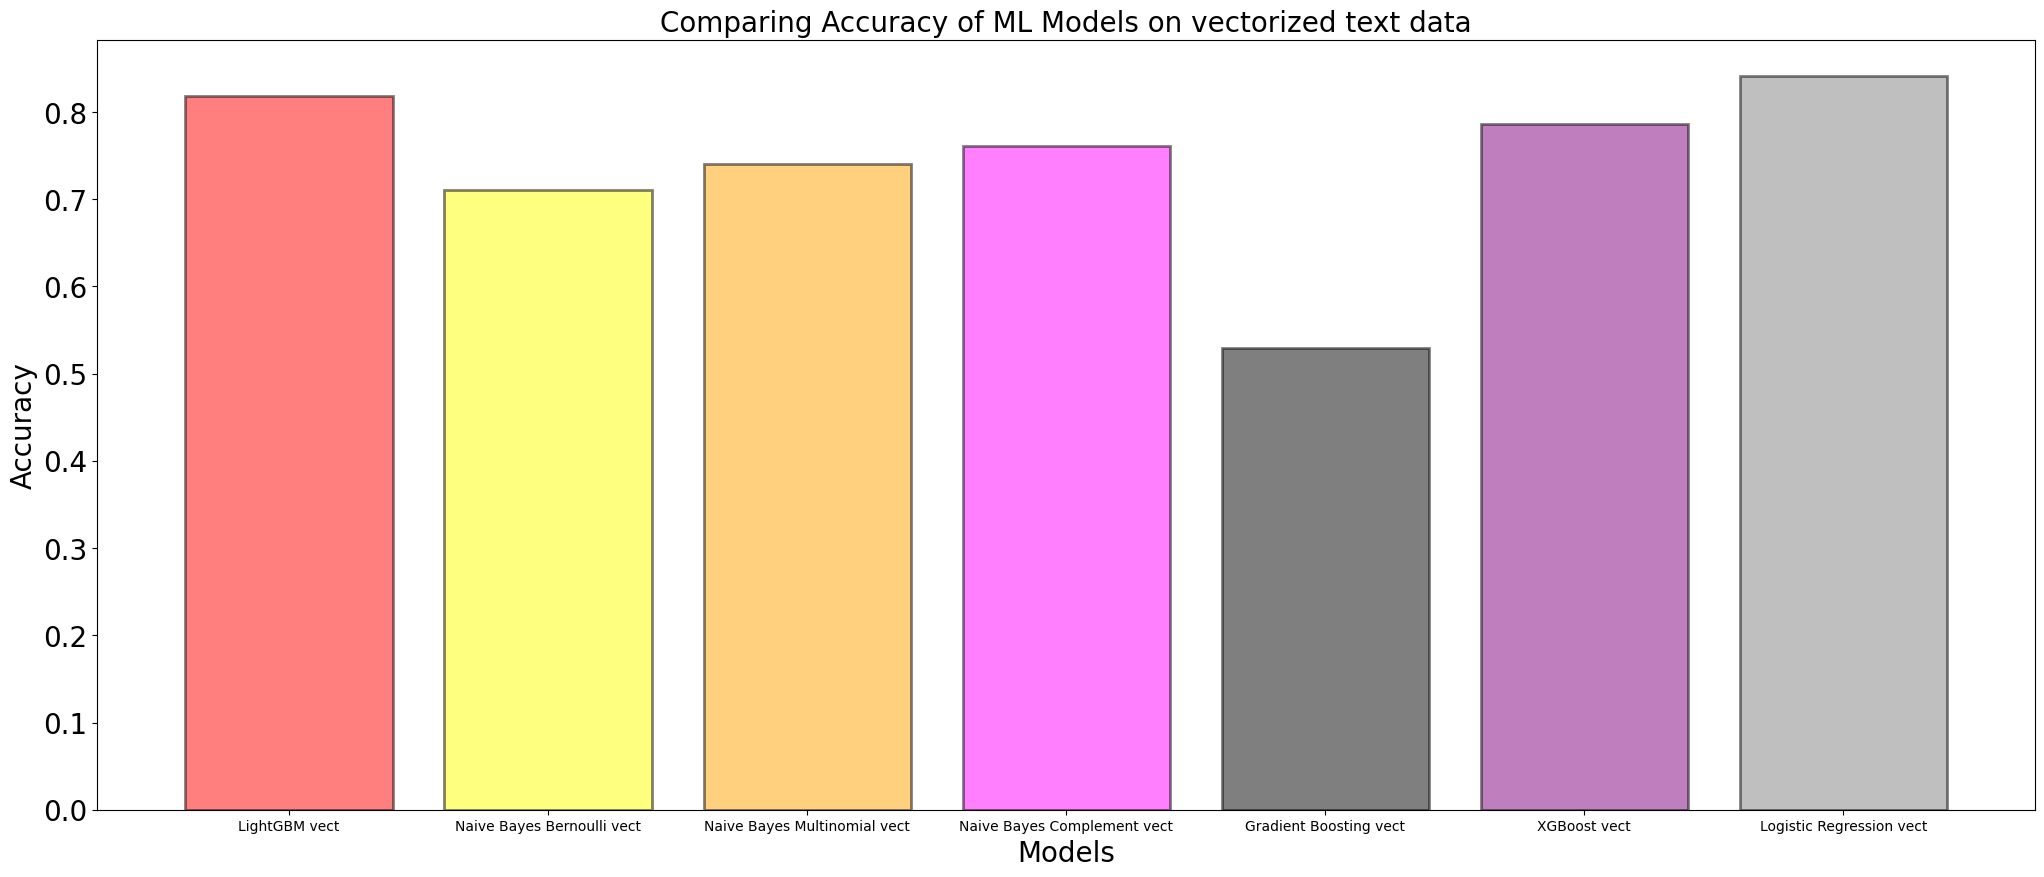

In [192]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(25,10))
plt.title('Comparing Accuracy of ML Models on vectorized text data',fontsize=20)
colors=['red','yellow','orange','magenta', 'black',
        #'white', 
        'purple', #
        'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_vect.keys(),labels_vect.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);

